In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/romanian-gdp-per-county-and-per-capita/gdpPerCounty.csv
/kaggle/input/romanian-gdp-per-county-and-per-capita/gdpPerCapitaPerCounty.csv


# Intro

Hello, in this small notebook we will take a very quick look at the datatset regarding romanian GDP per county and per capita. We will do some fast EDA and then we will plot two very nice and informative plots.

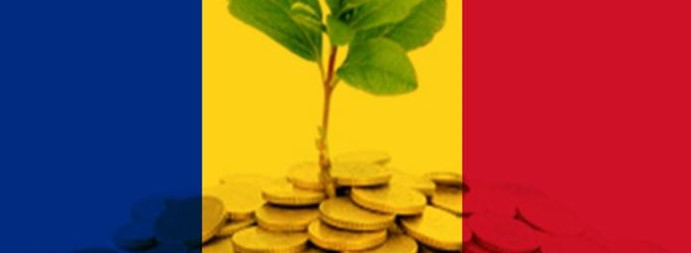

Let's get started!

# Imports
Here we will do the imports that we need. Nothing really fancy, just the usual suspects.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loading the data and minor EDA
Here we load the data and do some very simple EDA.

In [3]:
gdpPerCounty = pd.read_csv("/kaggle/input/romanian-gdp-per-county-and-per-capita/gdpPerCounty.csv")
gdpPerCountyAndPerCapita = pd.read_csv("/kaggle/input/romanian-gdp-per-county-and-per-capita/gdpPerCapitaPerCounty.csv")

In [4]:
print(gdpPerCounty.shape, gdpPerCountyAndPerCapita.shape)

(42, 8) (42, 8)


In [5]:
gdpPerCounty.head()

,county,region,2021,2022,2023,2024,2025,2026
0,Bacău,NE,22.9,27.0,29.9,33.2,36.1,39.0
1,Botoşani,NE,11.5,13.6,15.3,16.8,18.2,19.6
2,Iaşi,NE,40.1,47.5,53.2,58.9,64.0,68.9
3,Neamţ,NE,16.5,19.3,21.4,23.5,25.5,27.3
4,Suceava,NE,22.7,25.8,28.6,31.5,34.0,36.4


In [6]:
gdpPerCountyAndPerCapita.head()

,county,region,2021,2022,2023,2024,2025,2026
0,Bacău,NE,8131,9659,10670,11748,12708,13632
1,Botoşani,NE,6333,7591,8534,9398,10178,10927
2,Iaşi,NE,10228,12027,13326,14537,15586,16585
3,Neamţ,NE,7813,9228,10266,11278,12180,13046
4,Suceava,NE,7472,8505,9398,10251,10986,11695


# Plotting the data
First we will define the methods we will use, and then we will print the data.

In [7]:
# this method will create a new and more "print friendly" dataframe.
def createGraphDataFrame(df: pd.DataFrame):
    counties = []
    year2023 = []
    year2024 = []

    for row in df.iterrows():
        counties.append(row[1]["county"])
        year2023.append(row[1]["2023"])
        year2024.append(row[1]["2024"])

    gdf = pd.DataFrame(dict(counties=counties, y2023=year2023, y2024=year2024))

    gdf = gdf.sort_values(by=['y2024'])

    return gdf

In [8]:
# method to do the plot, we will plot as a horizontal bar plot the years 2023 and 2024
def plotDataFrame(gdf: pd.DataFrame, title: str):
    ind = np.arange(len(gdf))
    width = 0.4

    fig, ax = plt.subplots()
    ax.barh(ind, gdf["y2023"], width, label='2023')
    ax.barh(ind + width, gdf["y2024"], width, label='2024')

    ax.set(yticks=ind + width, yticklabels=gdf["counties"], ylim=[2 * width - 1, len(gdf)])
    ax.legend()
    ax.figure.set_size_inches(14, 12)

    fig.suptitle(title, fontsize=24)

    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.tick_params(axis='both', which='minor', labelsize=12)

    plt.show()

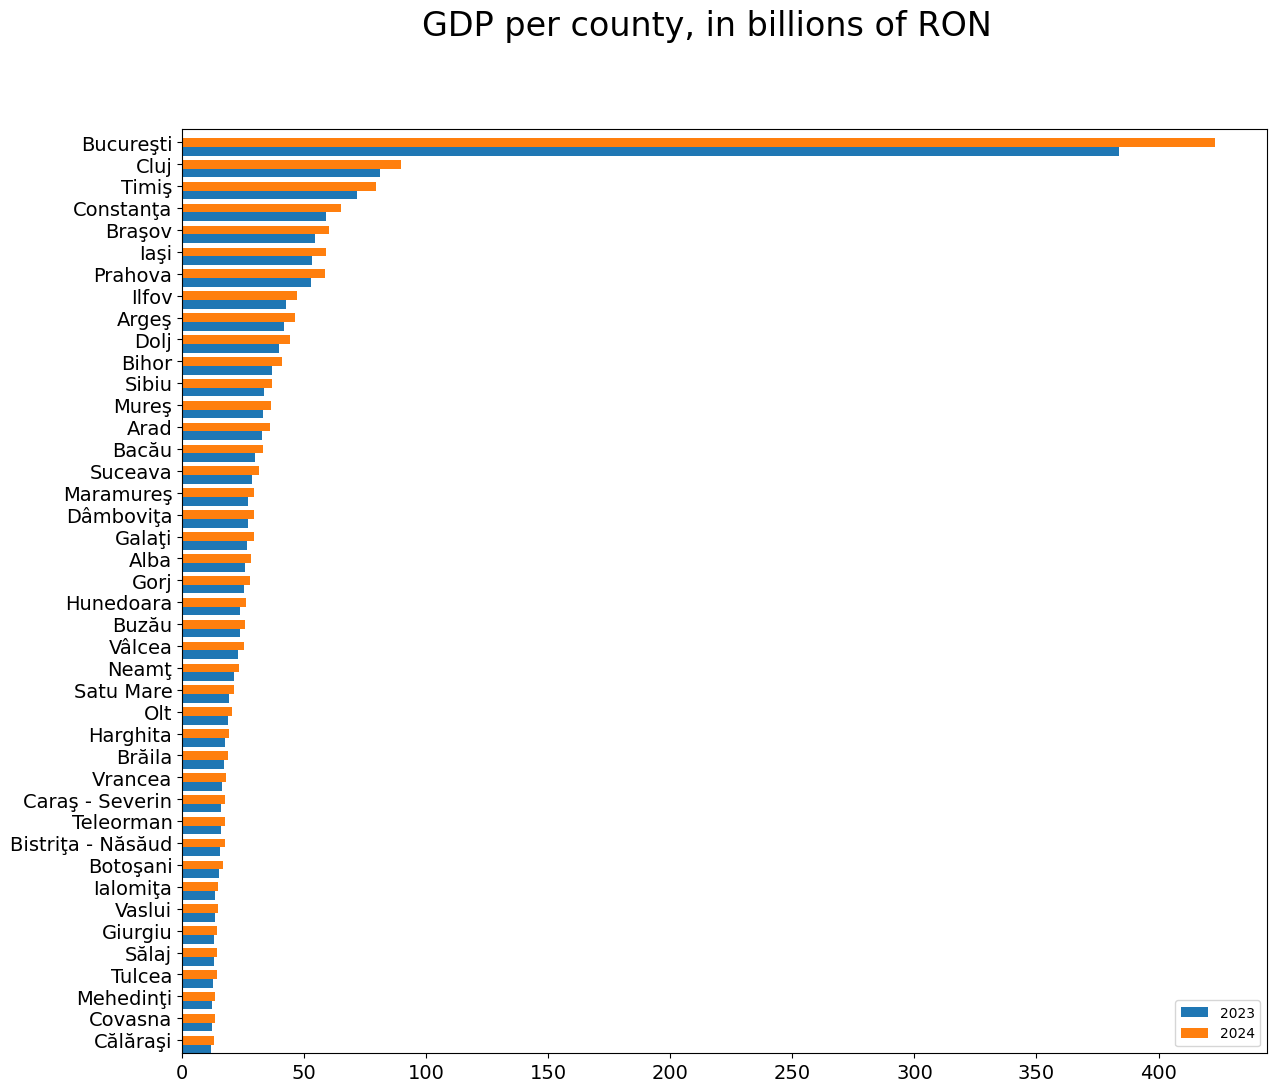

In [9]:
plotDataFrame(createGraphDataFrame(gdpPerCounty), "GDP per county, in billions of RON")

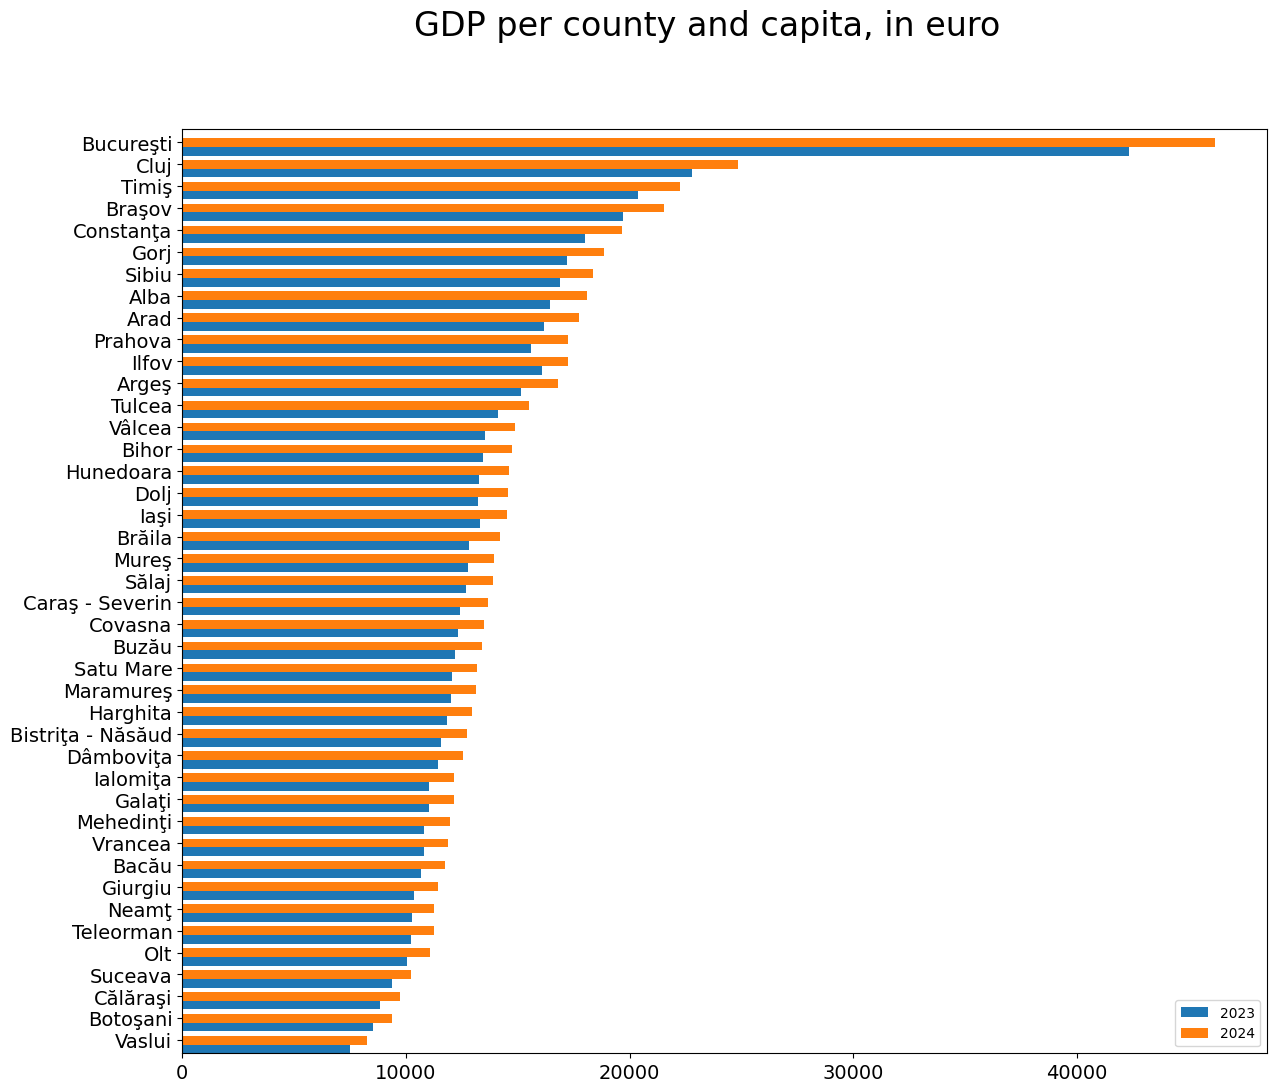

In [10]:
plotDataFrame(createGraphDataFrame(gdpPerCountyAndPerCapita), "GDP per county and capita, in euro")

# Finish!
You have made it to the finish, thank you! Please upvote if you like this :)